# DIABETES CLASSIFICATION USING LOGISTIC REGRESSION

# Step1: Understand data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df['Glucose'].value_counts

<bound method IndexOpsMixin.value_counts of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

# Step2: Build Logistic Regression Model 

In [9]:
X=df.drop(['Outcome'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y=df["Outcome"].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=8, test_size=0.25, random_state=42)
sss.get_n_splits(X, y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [14]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,121,78,39,74,39.0,0.261,28
358,12,88,74,40,54,35.3,0.378,48
718,1,108,60,46,178,35.5,0.415,24
536,0,105,90,0,0,29.6,0.197,46
651,1,117,60,23,106,33.8,0.466,27
...,...,...,...,...,...,...,...,...
676,9,156,86,0,0,24.8,0.230,53
113,4,76,62,0,0,34.0,0.391,25
556,1,97,70,40,0,38.1,0.218,30
152,9,156,86,28,155,34.3,1.189,42


In [15]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
635,13,104,72,0,0,31.2,0.465,38
698,4,127,88,11,155,34.5,0.598,28
637,2,94,76,18,66,31.6,0.649,23
402,5,136,84,41,88,35.0,0.286,35
425,4,184,78,39,277,37.0,0.264,31
...,...,...,...,...,...,...,...,...
62,5,44,62,0,0,25.0,0.587,36
477,7,114,76,17,110,23.8,0.466,31
311,0,106,70,37,148,39.4,0.605,22
116,5,124,74,0,0,34.0,0.220,38


In [16]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [17]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()


In [19]:
model_lor=log.fit(X_train,y_train)
model_lor

LogisticRegression()

In [20]:
y_predict=log.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

#  Step3:Predict on a new sample

In [21]:
new_person=[[6,200,90,10,25,23.3,0.672,42]]
print(log.predict(new_person))

[1]


C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Step3:Compute Classification Metrics

# Accuracy score

In [22]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [23]:
lor_ascores=accuracy_score(y_test,y_predict)
lor_ascores

0.7291666666666666

# Precision score

In [26]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_predict))

0.6363636363636364


# Recall score

In [27]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_predict))

0.5223880597014925


#    AUC score

In [28]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_predict))

0.6811940298507462


# Step4: Understand Correlation

In [29]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,y_predict)
cnf_matrix

array([[105,  20],
       [ 32,  35]], dtype=int64)

In [30]:
cf_ac_score=accuracy_score(y_test,y_predict)

In [31]:
cf_ac_score

0.7291666666666666

<AxesSubplot:>

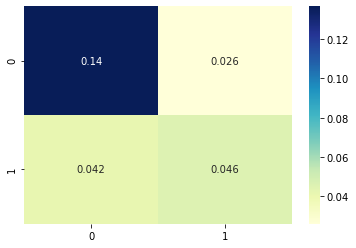

In [43]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict) / len(y), cmap='YlGnBu', annot=True)

# Step 5: Normalization using MinMaxScalar and rebuild LoR

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_trained=scaler.fit_transform(X_train)
X_tested=scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [32]:
X_trained.shape

(576, 8)

In [33]:
X_tested.shape

(192, 8)

# Create a new LogisticRegression model, fit on normalized training set and predict on the normalization test set

In [34]:
from sklearn.linear_model import LogisticRegression
log1 =LogisticRegression()


In [35]:
log1.fit(X_trained,y_train)

LogisticRegression()

In [36]:
yn_predict=log1.predict(X_tested)
yn_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
log1.score(X_trained,y_train)

0.7881944444444444

# Precision score

In [38]:
from sklearn.metrics import precision_score
print(precision_score(y_test,yn_predict))

0.6875


# Accuracy score

In [39]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [40]:
minmax_ascore=accuracy_score(y_test,yn_predict)
minmax_ascore

0.7447916666666666

# Recall score

In [41]:
from sklearn.metrics import recall_score
print(recall_score(y_test,yn_predict))

0.4925373134328358


# AUC score

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
lgr_auc=roc_auc_score(y_test,yn_predict)
lgr_auc1=('LoR minmax, AUC=',lgr_auc)
lgr_auc1

('LoR minmax, AUC=', 0.6862686567164178)

# Step6: Normalization using StandardScaler and rebuild LoR

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xs_trained=scaler.fit_transform(X_train)
Xs_tested=scaler.transform(X_test)

In [45]:
Xs_trained.shape

(576, 8)

In [46]:
Xs_tested.shape

(192, 8)

In [47]:
from sklearn.linear_model import LogisticRegression
log2=LogisticRegression()

In [48]:
log2.fit(Xs_trained,y_train)

LogisticRegression()

In [49]:
ys_predict=log2.predict(Xs_tested)
ys_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
log2.score(Xs_trained,y_train)

0.7951388888888888

# Precision score

In [51]:
from sklearn.metrics import precision_score
print(precision_score(y_test,ys_predict))

0.6481481481481481


# Recall score

In [52]:
from sklearn.metrics import recall_score
print(recall_score(y_test,ys_predict))

0.5223880597014925


# Accuracy score

In [53]:
from sklearn.metrics import accuracy_score
ss_ascore=accuracy_score(y_test,ys_predict)

In [54]:
ss_ascore

0.734375

# AUC Score

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
ss_auc=roc_auc_score(y_test,ys_predict)
ss_auc1=(' AUC=',ss_auc)
ss_auc1

(' AUC=', 0.6851940298507463)

# Among the 3 models,which one gives better classification scores?

In [57]:
print('StandardScaler:',ss_ascore)
print('MinMaxScaler:',minmax_ascore)
print('Logistic Regression Model:',lor_ascores)

StandardScaler: 0.734375
MinMaxScaler: 0.7447916666666666
Logistic Regression Model: 0.7291666666666666


# Step7: Plot ROC curve

# Plot ROC curve as shown below.you can use the minmaxscaler scaler values of X_test for computing predict_proba() score.

In [58]:
from sklearn.metrics import roc_curve

In [59]:
predict_pb1=log.predict_proba(X_tested)
fpr1, tpr1, threshold1 = roc_curve(y_test,predict_pb1[:,1],pos_label=1)

<ipython-input-61-7f9d65262bb6>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.7,0], s=ss_auc1)


Text(0.7, 0, "(' AUC=', 0.6851940298507463)")

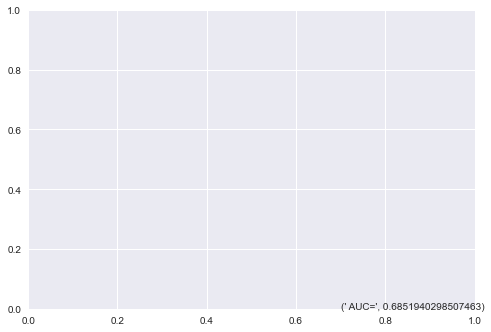

In [61]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.annotate(xy=[0.7,0], s=ss_auc1)


# Step8: Comparison with KNN classifier

# Update your ROC curve,this time,with one more curve of KNN classifier,as shown below

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
log3=KNeighborsClassifier(n_neighbors=3)
log3.fit(X_trained,y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
yk_predict=log3.predict(X_tested)
yk_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

# Precision score

In [65]:
from sklearn.metrics import precision_score
print(precision_score(y_test,yk_predict))

0.6140350877192983


# Recall score

In [66]:
from sklearn.metrics import recall_score
print(recall_score(y_test,yk_predict))

0.5223880597014925


# Accuracy score

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yk_predict))

0.71875


# AUC score

In [68]:
from sklearn.metrics import roc_auc_score
kn_auc=roc_auc_score(y_test,yk_predict)
kn_auc1=('KNN minmax,AUC=',kn_auc)
kn_auc1

('KNN minmax,AUC=', 0.6731940298507463)

# Step9: Update ROC curve

# Update your ROC curve,this time,with one more curve of KNN classifier

In [69]:
predict_pb2=log3.predict_proba(X_tested)
fpr1, tpr1, threshold1 = roc_curve(y_test,predict_pb1[:,1],pos_label=1)
fpr2, tpr2, threshold2 = roc_curve(y_test,predict_pb2[:,1],pos_label=1)

<ipython-input-70-ef24633fedcb>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.6,0.1], s=kn_auc1)
<ipython-input-70-ef24633fedcb>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.6,0], s=lgr_auc1)


Text(0, 0.5, 'True Positive Rate')

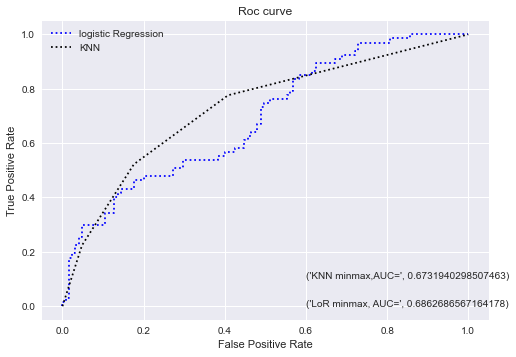

In [70]:
plt.plot(fpr1, tpr1, linestyle=':',color='blue',label='logistic Regression')
plt.plot(fpr2, tpr2, linestyle=':',color='black',label='KNN')
plt.annotate(xy=[0.6,0.1], s=kn_auc1)
plt.annotate(xy=[0.6,0], s=lgr_auc1)
plt.legend(loc='best')
plt.title('Roc curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Step10: Regularization

# In order to reduce overfitting of your data,you will use logisticRegressionCV model with L1,L2 regularization parameter.create both models using the following statements

In [71]:
from sklearn.linear_model import LogisticRegressionCV

In [72]:
log4=LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear')
log5=LogisticRegressionCV(Cs=10, cv=4, penalty='l2')

# Perform fit using MinmaxScaler scaled values and predict

In [73]:
print(log4.fit(X_trained,y_train))
print(log5.fit(X_trained,y_train))

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')
LogisticRegressionCV(cv=4)


In [74]:
lr_y_predict1 = log4.predict(X_tested)
lr_y_predict2= log5.predict(X_tested)
print('Logistic RegressionCV L1:\n',lr_y_predict1)
print('-------------------------------------------------------------------')
print('Logistic Regression L2:\n',lr_y_predict2)

Logistic RegressionCV L1:
 [0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0]
-------------------------------------------------------------------
Logistic Regression L2:
 [0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0]


In [75]:
from sklearn.metrics import roc_auc_score
lrp_auc=roc_auc_score(y_test,lr_y_predict1)
lrp1_auc=('LoR L1 minmax, AUC=',lrp_auc)
lrp1_auc

('LoR L1 minmax, AUC=', 0.6811940298507462)

In [76]:
from sklearn.metrics import roc_auc_score
lrp_auc2=roc_auc_score(y_test,lr_y_predict2)
lrp2_auc=('LoR L2 minmax, AUC=',lrp_auc2)
lrp2_auc

('LoR L2 minmax, AUC=', 0.6891940298507462)

# Step11: Update ROC curve

# Update your ROC curve,this time,with two more curves

In [77]:
predict_pb3=log4.predict_proba(X_tested)
predict_pb4=log5.predict_proba(X_tested)
fpr1, tpr1, threshold1 = roc_curve(y_test,predict_pb1[:,1],pos_label=1)
fpr2, tpr2, threshold2 = roc_curve(y_test,predict_pb2[:,1],pos_label=1)
fpr3, tpr3, threshold3 = roc_curve(y_test,predict_pb3[:,1],pos_label=1)
fpr4, tpr4, threshold4 = roc_curve(y_test,predict_pb4[:,1],pos_label=1)

<ipython-input-78-a050a299c5c1>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.49,0.3], s=kn_auc1)
<ipython-input-78-a050a299c5c1>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.49,0.2], s=lgr_auc1)
<ipython-input-78-a050a299c5c1>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.49,0.1], s=lrp1_auc)
<ipython-input-78-a050a299c5c1>:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.49,0], s=lrp2_

Text(0, 0.5, 'True Positive Rate')

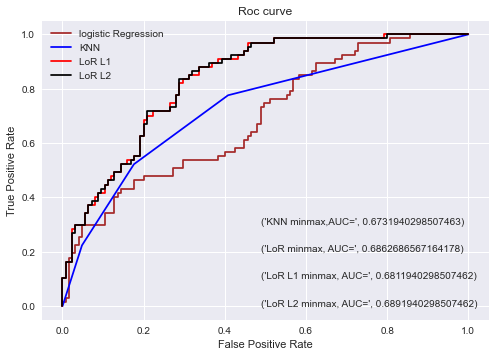

In [78]:
plt.plot(fpr1, tpr1, linestyle='-',color='brown',label='logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='blue',label='KNN')
plt.plot(fpr3, tpr3, linestyle='-',color='red',label='LoR L1')
plt.plot(fpr4, tpr4, linestyle='-',color='black',label='LoR L2')
plt.annotate(xy=[0.49,0.3], s=kn_auc1)
plt.annotate(xy=[0.49,0.2], s=lgr_auc1)
plt.annotate(xy=[0.49,0.1], s=lrp1_auc)
plt.annotate(xy=[0.49,0], s=lrp2_auc)
plt.legend(loc='best')
plt.title('Roc curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [37]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR=LinearRegression()
LR.score(y_test,yk_predict)

In [29]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot
ERROR: No matching distribution found for scikitplot


In [ ]:
import scikitplot as skplt


In [ ]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_cumulative_gain(y_true=y, y_probas=probas)
plt.show()